### Analisi descrittiva dei dati 

<p>

<br> 1. Sostituzione dei valori anomali. Valutare più scenari: senza considerare i valori anomali? 
In questa analisi i valori anomali sono stati sostituiti con l'ultimo valore conosciuto prima della presentazione del valore anomalo <br />

<br> 2. Formattazione della data e aggiunta di ulteriori features  <br />

<br> 3. Aggregazione dei valori per data e cella e relative visualizzazioni - serie temporali<br />

<br> 4. Visualizzazione dei dati geografici - griglia <br />

</p>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [3]:
# carica dati 
#data = pd.read_csv('timeseries/AereoportoBLQ_20170416_20170817', 
#                   header = None, names=['date', 'cell_num', 'nr_people'], index_col = None)
data = pd.read_csv('/Users/alket/Desktop/dati/new_data2_Modena_backfill_forwfill.csv',index_col = 0, parse_dates=True)
data

date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15970811  2017-08-16  421-1055       17.0   22.0     45.0
15972164  2017-08-16  421-1055       17.0   23.0      0.0
15973517  2017-08-16  421-1055       17.0   23.0     15.0
15974870  2017-08-16  421-1055       18.0   23.0     30.0
15976223  2017-08-16  421-1055       18.0   23.0     45.0

[15976224 rows x 5 columns]

In [4]:
# info sui dati e tipo dato
data.describe()

nr_people         hours       minutes
count  1.597622e+07  1.597622e+07  1.597622e+07
mean   3.404587e+02  1.150000e+01  2.250000e+01
std    3.345102e+02  6.922187e+00  1.677051e+01
min    4.000000e+00  0.000000e+00  0.000000e+00
25%    1.620000e+02  5.750000e+00  1.125000e+01
50%    3.210000e+02  1.150000e+01  2.250000e+01
75%    4.560000e+02  1.725000e+01  3.375000e+01
max    6.553400e+04  2.300000e+01  4.500000e+01

In [5]:
agg_by_cell = data.groupby(by = data['nr_people'])
cell_date = data.groupby(['cell_num','date'])

('389-1015', '2017-04-16')


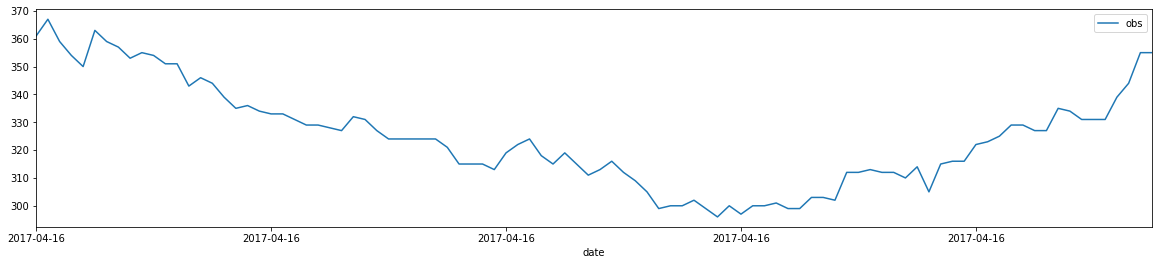

('389-1015', '2017-04-17')


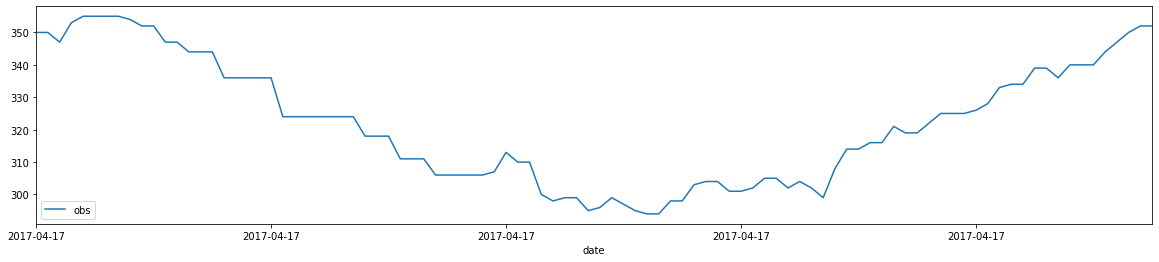

('389-1015', '2017-04-18')


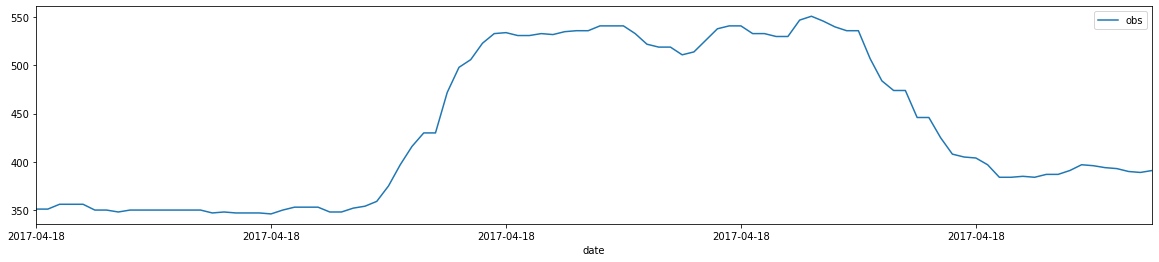

('389-1015', '2017-04-19')


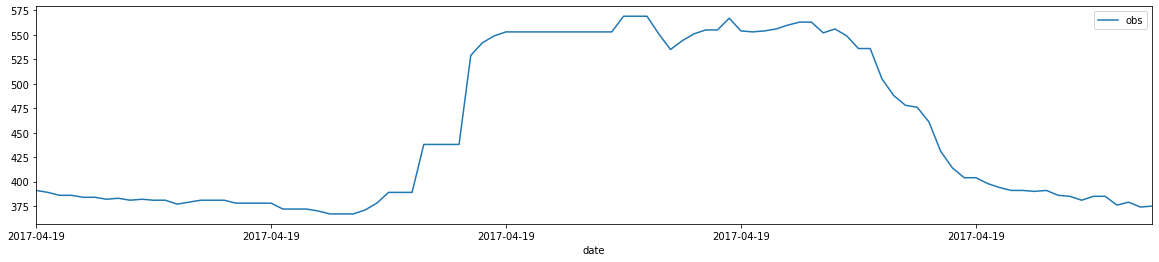

('389-1015', '2017-04-20')


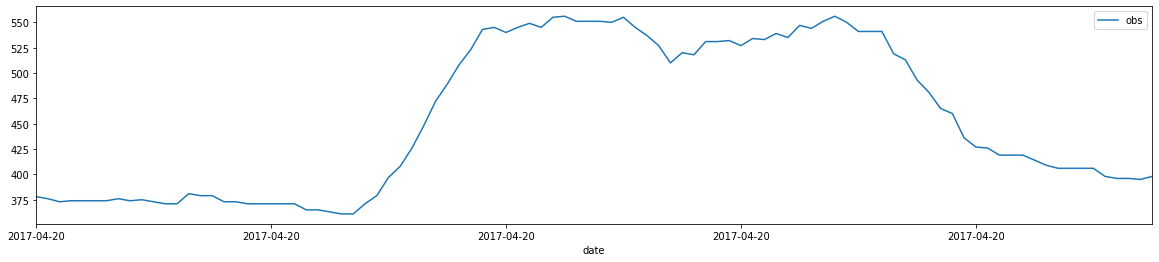

('389-1015', '2017-04-21')


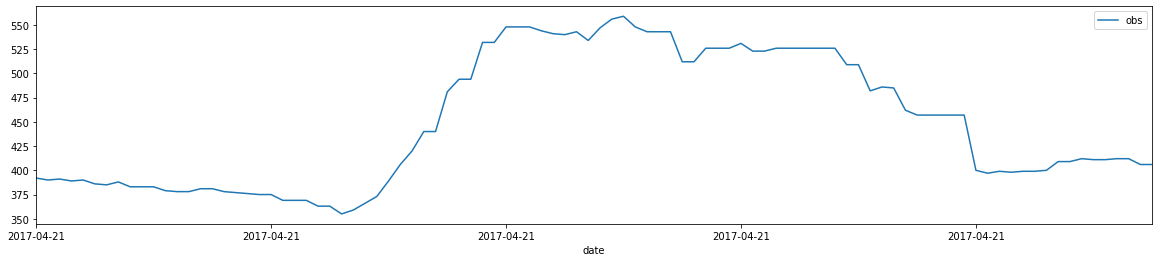

('389-1015', '2017-04-22')


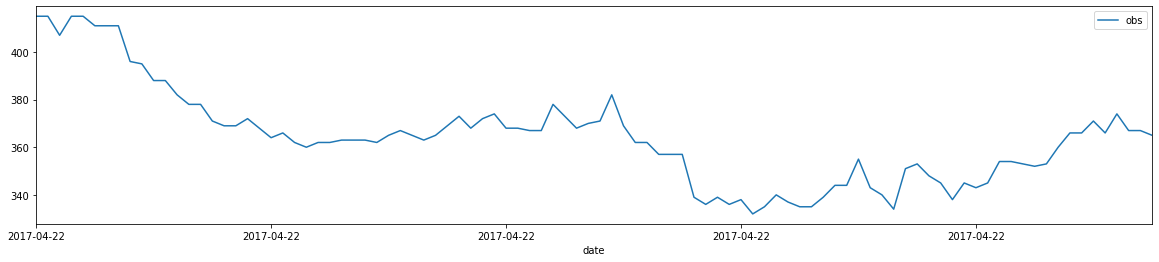

('389-1015', '2017-04-23')


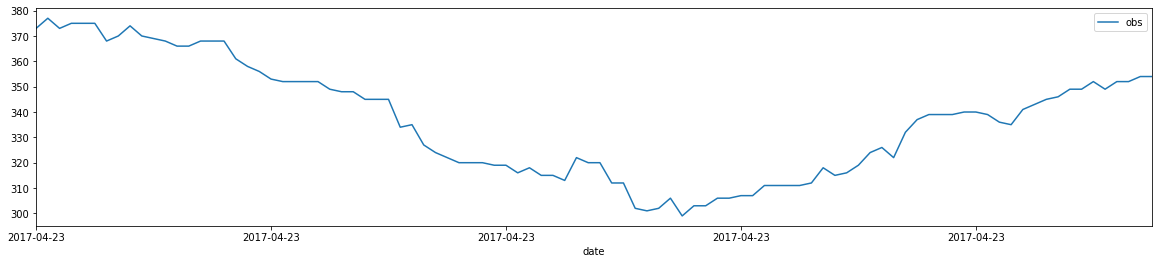

('389-1015', '2017-04-24')


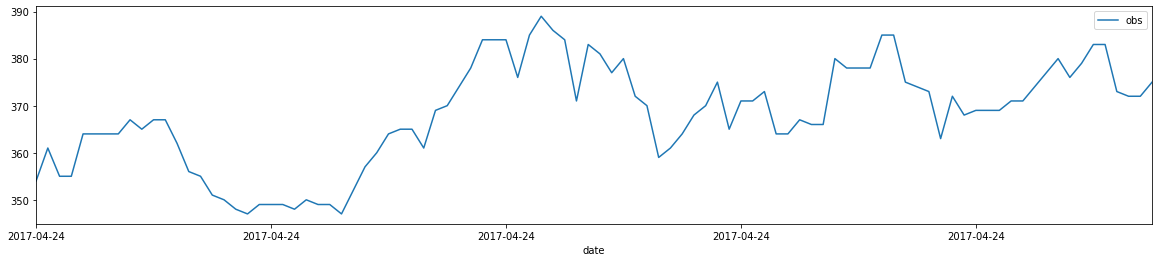

('389-1015', '2017-04-25')


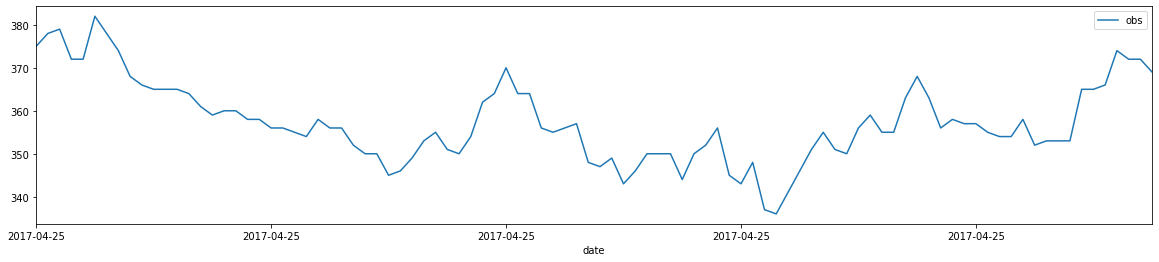

('389-1015', '2017-04-26')


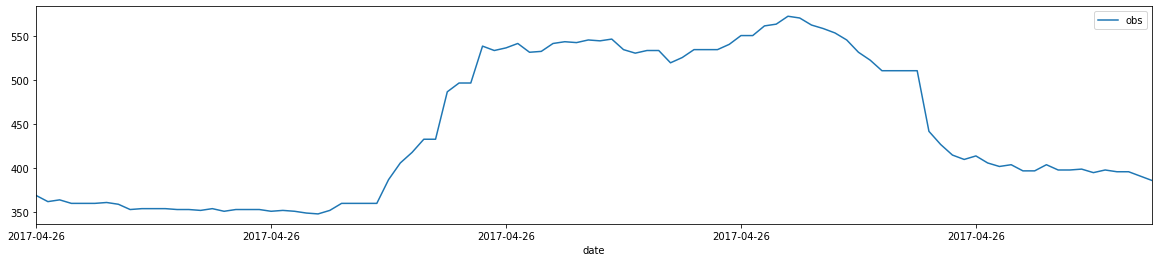

('389-1015', '2017-04-27')


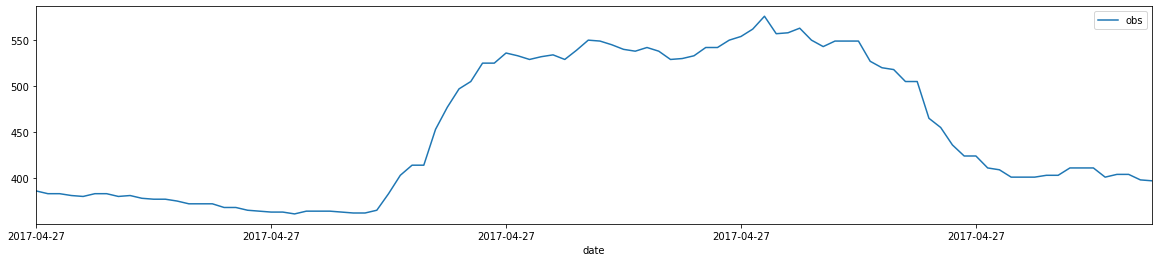

('389-1015', '2017-04-28')


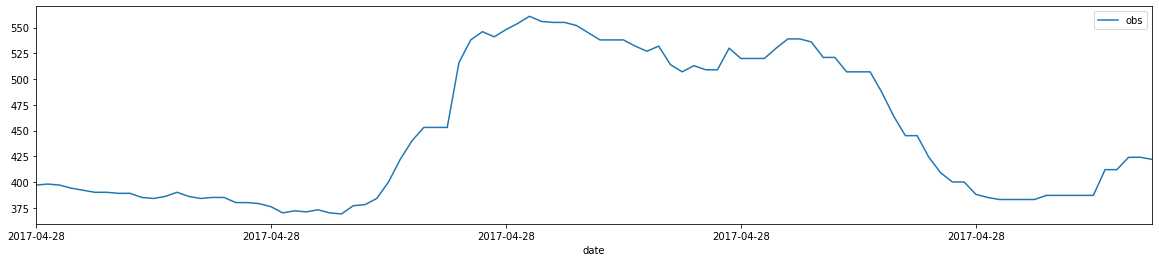

('389-1015', '2017-04-29')


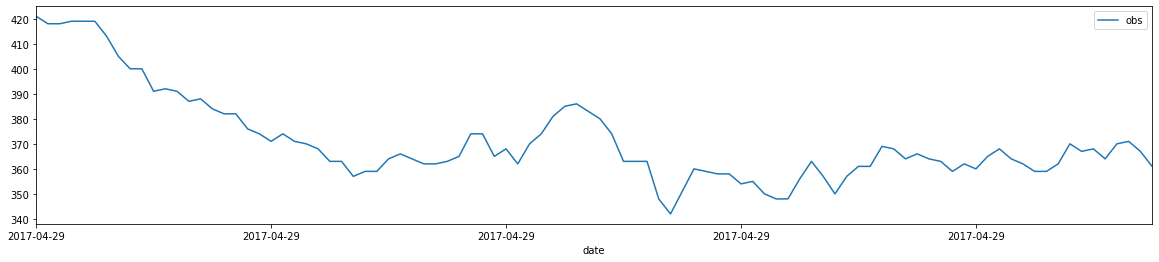

('389-1015', '2017-04-30')


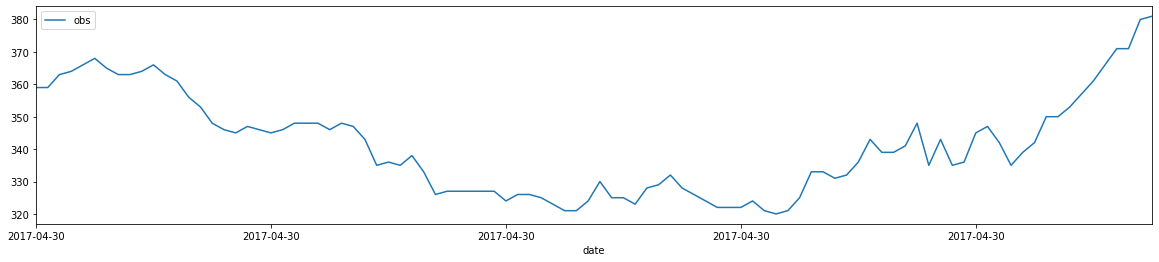

('389-1015', '2017-05-01')


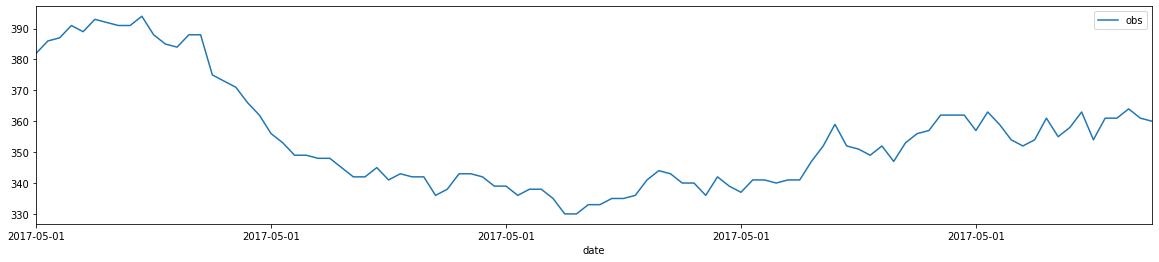

In [6]:
count = 0
for i, k in cell_date: 
    count +=1
   
    frame = { 'date': k.date, 'obs': k.nr_people } 
    k.set_index('date')
    print(i)
    result = pd.DataFrame(frame) 
    result = result.set_index('date')
    fig, ax = plt.subplots(figsize = (20, 4))
    result.plot(ax=ax)

    plt.show()
    if count > 15: 
        break

In [7]:
# Da questo andamento periodico dei valori di attivita di cella, 
# si potrebbe dedurre anche l'ora nella quale è stata fatta l'osservazione ?? 

In [8]:
agg_by_date = data.groupby(by = ['date'])
print('GroupBy date = ',len(agg_by_date))
agg_by_cell = data.groupby(by = ['cell_num'])
print('GroupBy cell = ',len(agg_by_cell))

GroupBy date =  123
GroupBy cell =  1353


1 ------------------>>>


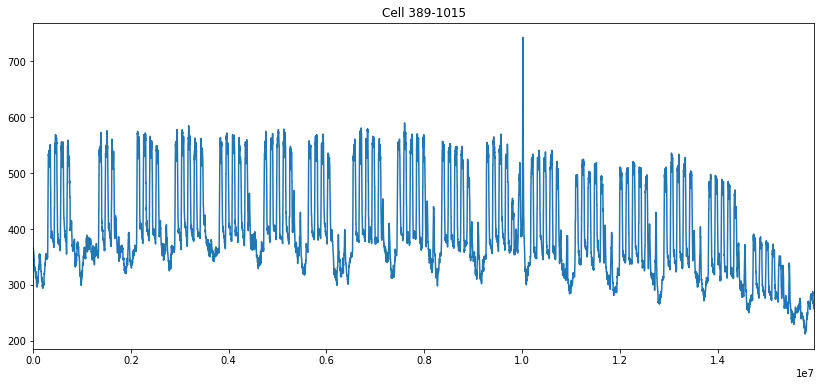

2 ------------------>>>


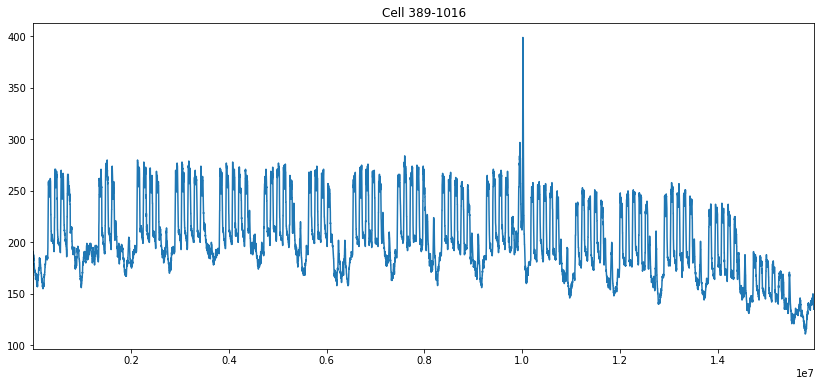

3 ------------------>>>


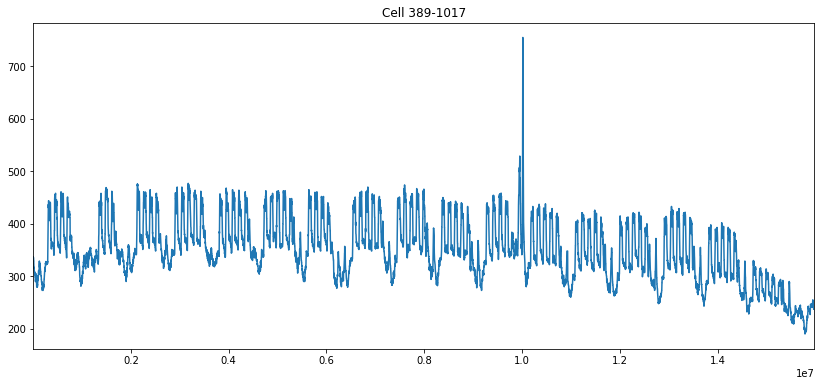

4 ------------------>>>


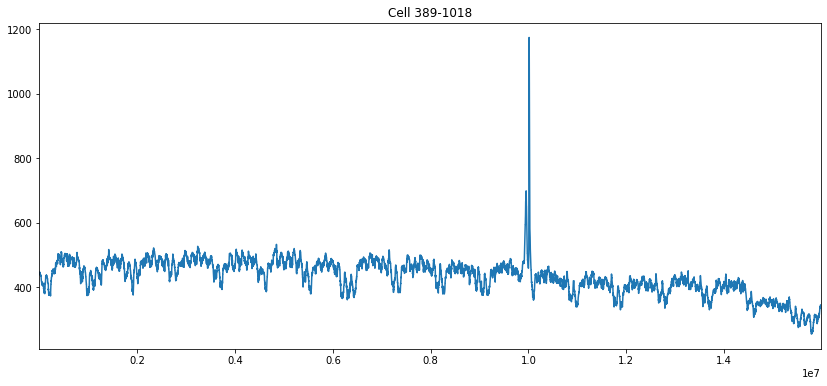

5 ------------------>>>


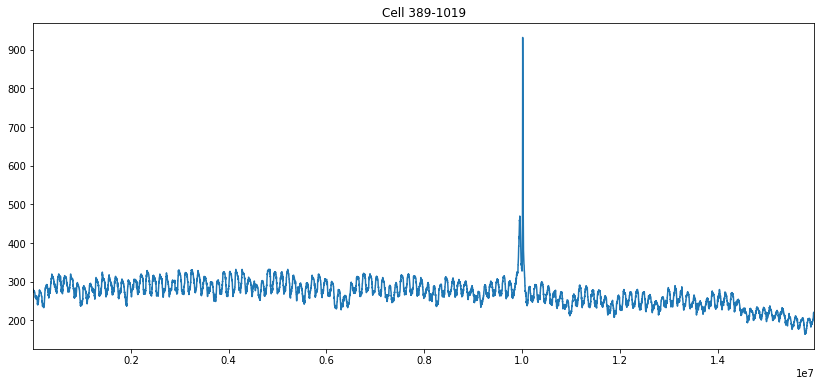

6 ------------------>>>


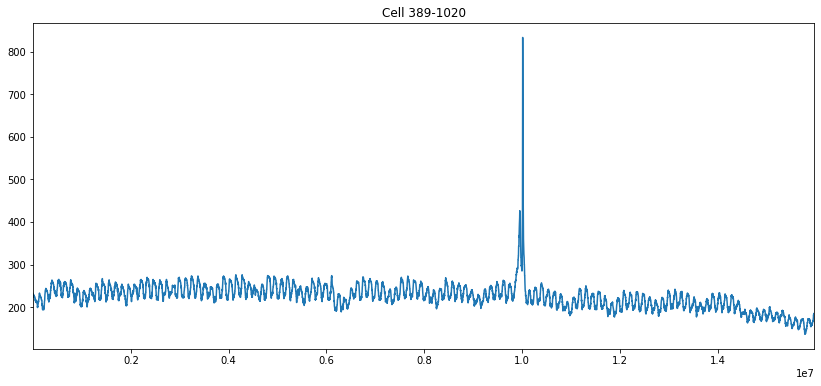

7 ------------------>>>


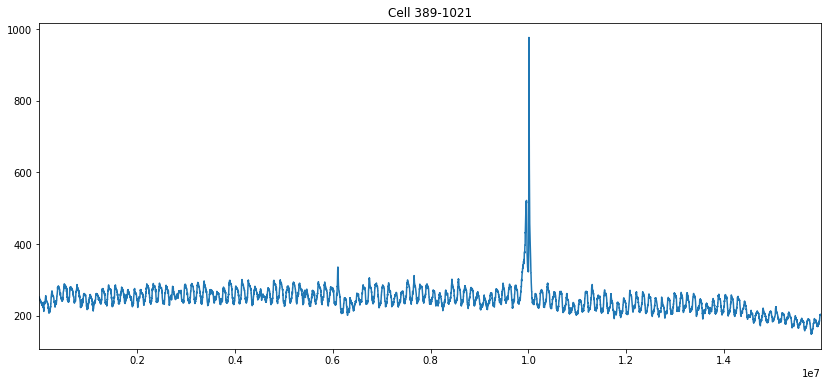

In [9]:
# grafico che mostra le osservazioni per tutte le celle con riferimento a una data 
count = 0
for i, k in agg_by_cell:
    count +=1
    print(count, '------------------>>>')
    k['nr_people'].plot(title='Cell '+i, figsize = (14, 6))
    plt.show()
    if count > 6:
        break

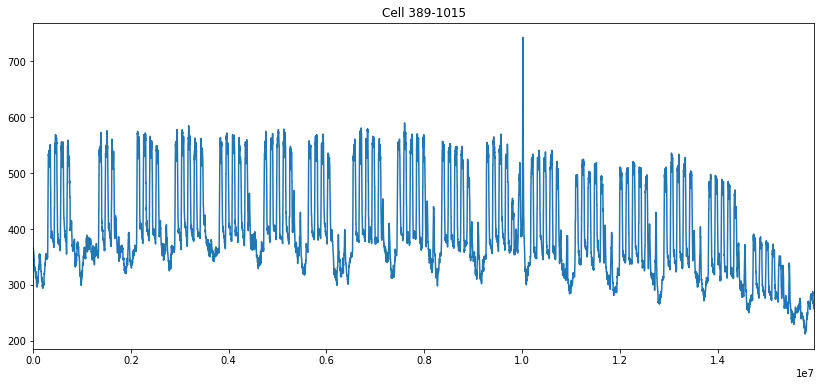

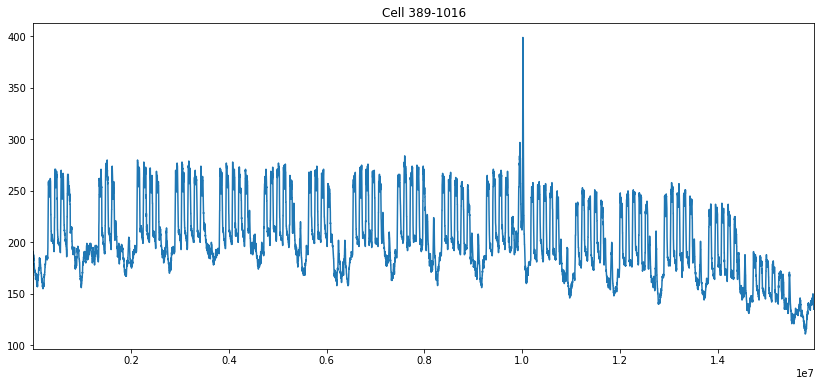

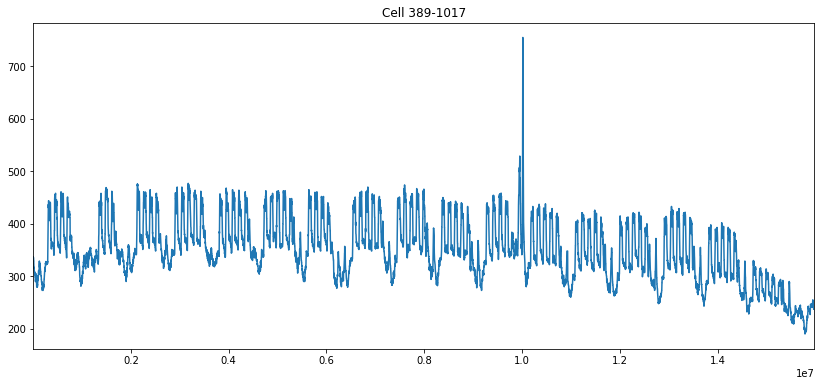

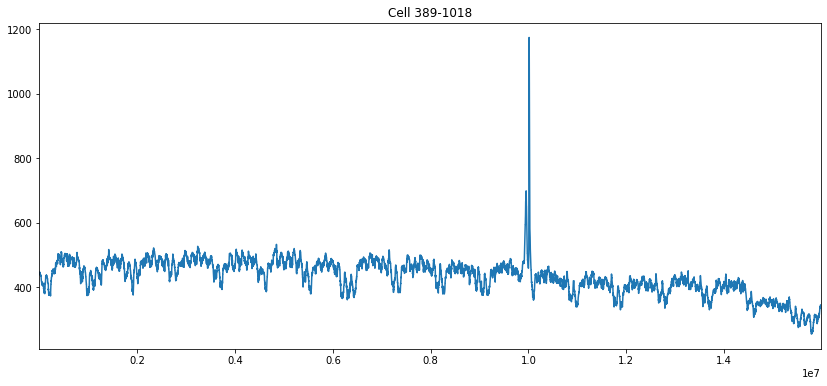

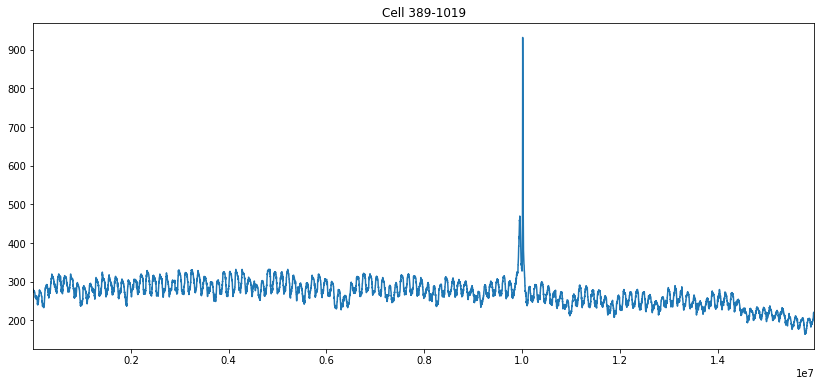

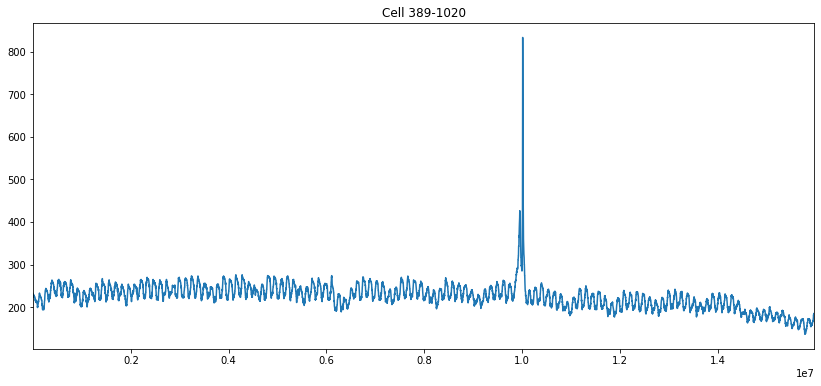

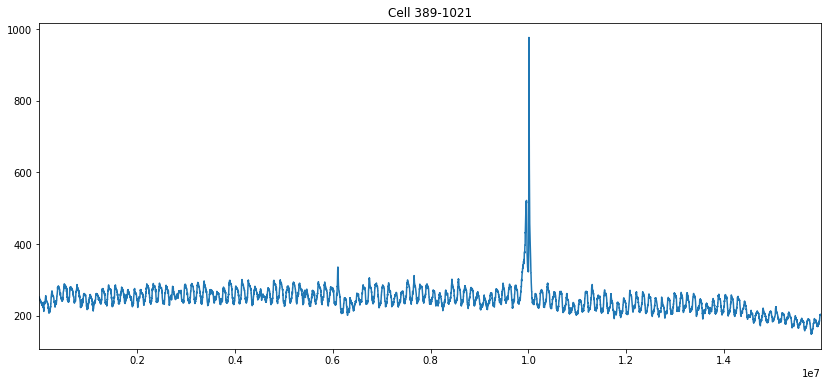

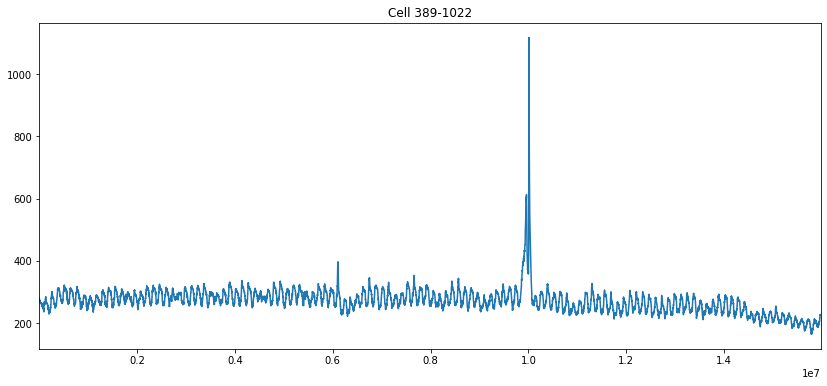

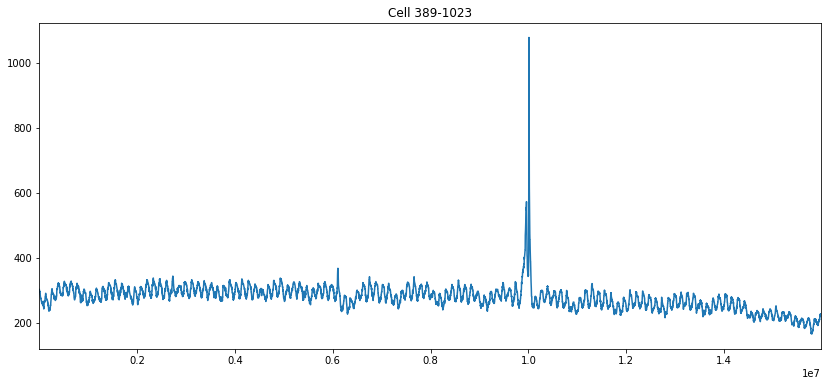

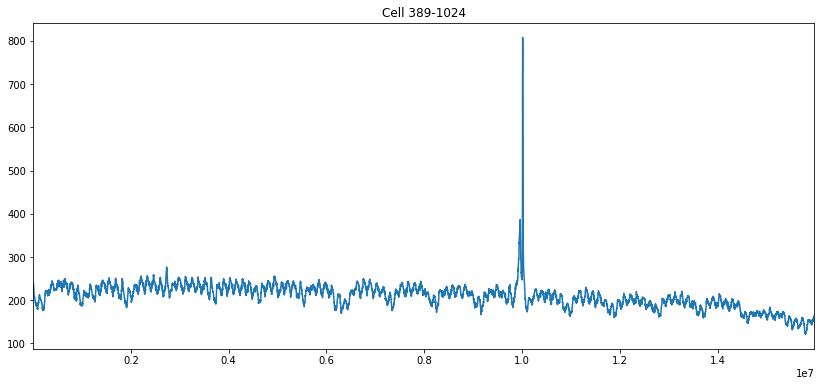

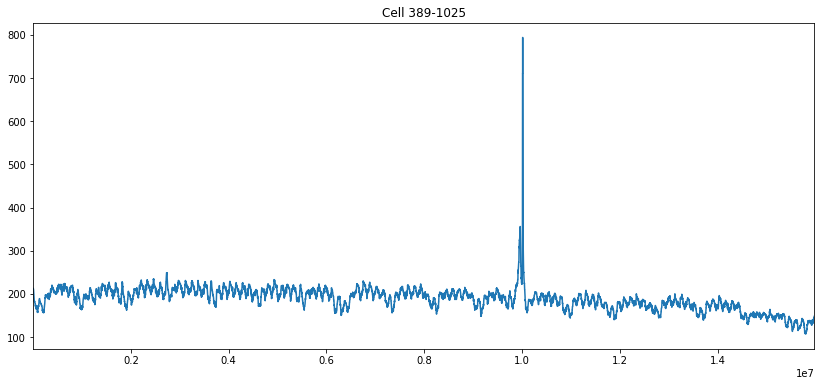

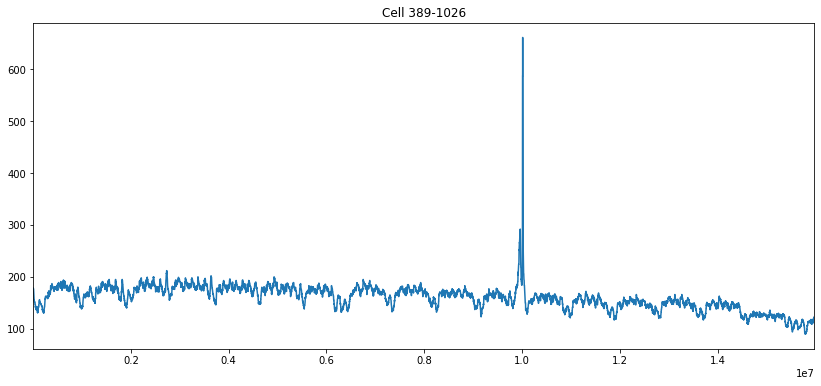

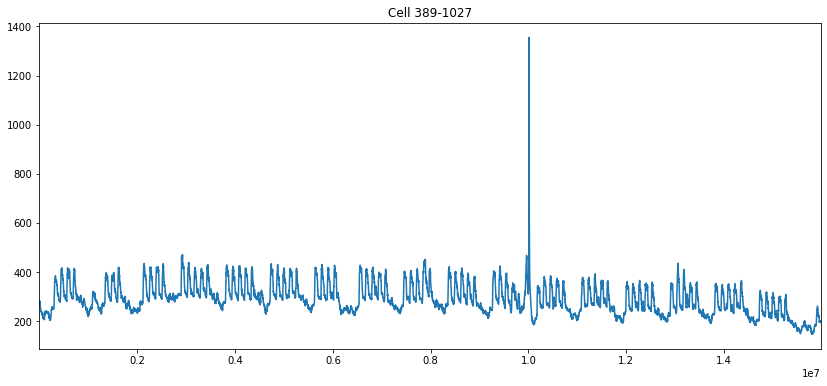

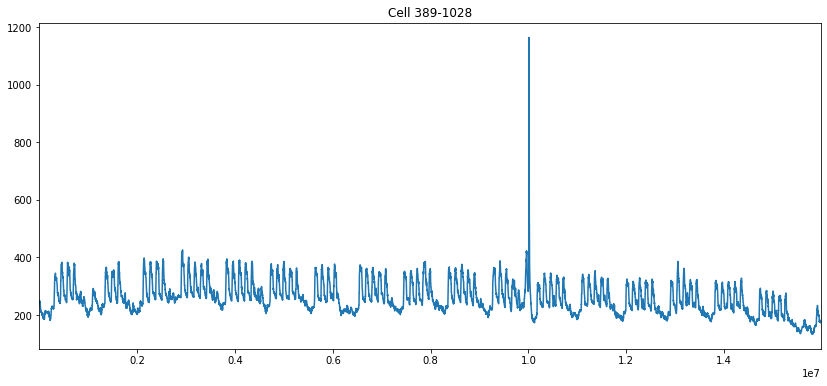

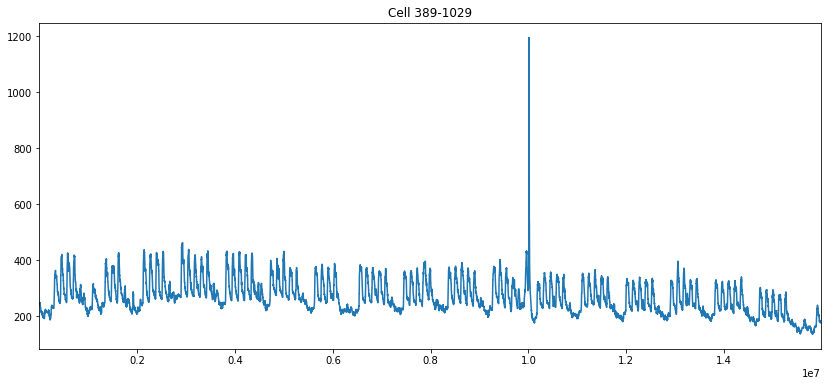

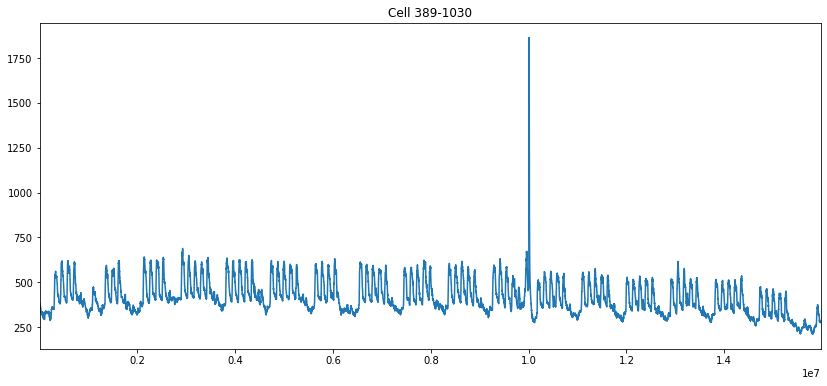

In [10]:
# grafico che mostra le osservazioni per tutte le date con riferimento a una data cella 
count = 0
for i, k in agg_by_cell: 
    k['nr_people'].plot(title='Cell '+i, figsize = (14, 6))
    plt.show()
    count += 1
    if count > 15:
        break

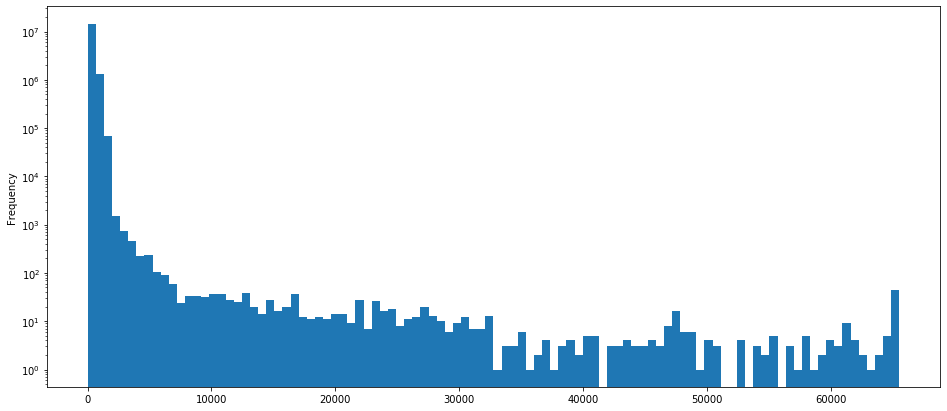

In [11]:
# histogramma della distribuzione dei valori cella (nr_persone) in scala logaritmica 
data['nr_people'].plot(kind = 'hist', figsize = (16, 7), bins = 100, log = True);

In [12]:
data

date  cell_num  nr_people  hours  minutes
0         2017-04-16  389-1015      361.0    0.0      0.0
1353      2017-04-16  389-1015      367.0    0.0     15.0
2706      2017-04-16  389-1015      359.0    0.0     30.0
4059      2017-04-16  389-1015      354.0    0.0     45.0
5412      2017-04-16  389-1015      350.0    1.0      0.0
...              ...       ...        ...    ...      ...
15970811  2017-08-16  421-1055       17.0   22.0     45.0
15972164  2017-08-16  421-1055       17.0   23.0      0.0
15973517  2017-08-16  421-1055       17.0   23.0     15.0
15974870  2017-08-16  421-1055       18.0   23.0     30.0
15976223  2017-08-16  421-1055       18.0   23.0     45.0

[15976224 rows x 5 columns]

In [13]:
# crea un campo 'is_business_day' con valore binario
business_day = []

def find_business_days(business_day):
    for i in data.date:
        #print(i)
        s = i.split('-')
        year = int(s[0])
       # print(year, '----------------_>>>>><')
        month = int(s[1])
        day = int(s[2])
    
        dayofweek = datetime.date(year, month, day).strftime("%A")
        if ((dayofweek == 'Saturday') | (dayofweek == 'Sunday')): 
            business_day.append(0)
        else: 
            business_day.append(1)
     
    return business_day

bd = find_business_days(business_day)
data['is_business_day']= bd  


In [14]:
# crea una feature media 'mean' 
d_cell = {}
for i, k in agg_by_cell: 
    #print(i, k)
    d_cell[i] = int(k['nr_people'].mean())  
    
val = []

for i in data['cell_num']:
    val_i = d_cell.get(i)
    val.append(val_i)
        
data['mean']= val 
data 

date  cell_num  nr_people  hours  minutes  is_business_day  \
0         2017-04-16  389-1015      361.0    0.0      0.0                0   
1353      2017-04-16  389-1015      367.0    0.0     15.0                0   
2706      2017-04-16  389-1015      359.0    0.0     30.0                0   
4059      2017-04-16  389-1015      354.0    0.0     45.0                0   
5412      2017-04-16  389-1015      350.0    1.0      0.0                0   
...              ...       ...        ...    ...      ...              ...   
15970811  2017-08-16  421-1055       17.0   22.0     45.0                1   
15972164  2017-08-16  421-1055       17.0   23.0      0.0                1   
15973517  2017-08-16  421-1055       17.0   23.0     15.0                1   
15974870  2017-08-16  421-1055       18.0   23.0     30.0                1   
15976223  2017-08-16  421-1055       18.0   23.0     45.0                1   

          mean  
0          396  
1353       396  
2706       396  
4059       396  
5412       396  
...        ...  
15970811    22  
15972164    22  
15973517    22  
15974870    22  
15976223    22  

[15976224 rows x 7 columns]

In [15]:
business_h = []
def find_business_hours(business_h):
    for i in data['hours']:
        if i > 8 and i < 21 :
            business_h.append(1)
        
        else:
            business_h.append(0)
    return business_h  

business_h = find_business_hours(business_h)        
data['is_business_hour'] = business_h

In [16]:
data

date  cell_num  nr_people  hours  minutes  is_business_day  \
0         2017-04-16  389-1015      361.0    0.0      0.0                0   
1353      2017-04-16  389-1015      367.0    0.0     15.0                0   
2706      2017-04-16  389-1015      359.0    0.0     30.0                0   
4059      2017-04-16  389-1015      354.0    0.0     45.0                0   
5412      2017-04-16  389-1015      350.0    1.0      0.0                0   
...              ...       ...        ...    ...      ...              ...   
15970811  2017-08-16  421-1055       17.0   22.0     45.0                1   
15972164  2017-08-16  421-1055       17.0   23.0      0.0                1   
15973517  2017-08-16  421-1055       17.0   23.0     15.0                1   
15974870  2017-08-16  421-1055       18.0   23.0     30.0                1   
15976223  2017-08-16  421-1055       18.0   23.0     45.0                1   

          mean  is_business_hour  
0          396                 0  
1353       396                 0  
2706       396                 0  
4059       396                 0  
5412       396                 0  
...        ...               ...  
15970811    22                 0  
15972164    22                 0  
15973517    22                 0  
15974870    22                 0  
15976223    22                 0  

[15976224 rows x 8 columns]

In [17]:
# trova le osservazioni fatte nei giorni lavorativi e negli weekend 
business_days = data[data['is_business_day']==1]
weekends = data[data['is_business_day']==0]
bd = business_days['nr_people'].to_numpy()
wd = weekends['nr_people'].to_numpy()

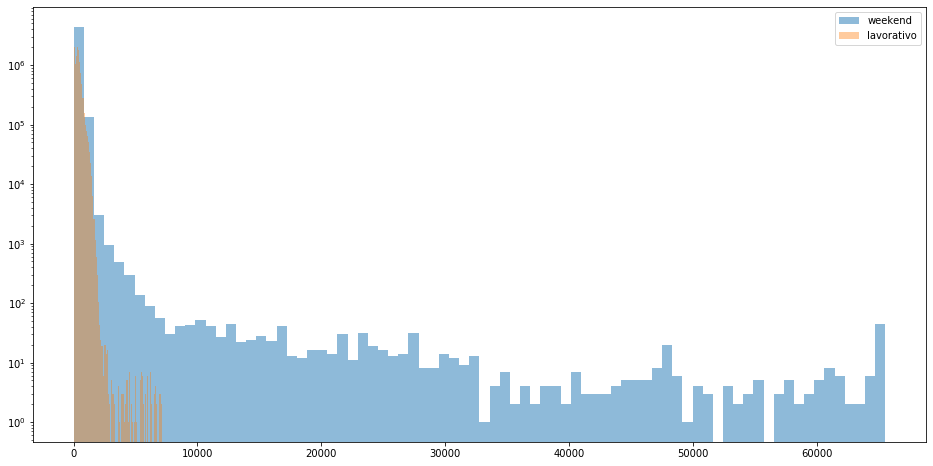

In [18]:
plt.figure(figsize=(16,8))
plt.hist(wd, 80, alpha= 0.5, label = 'weekend', log = True)
plt.hist(bd, 80, alpha= 0.4, label = 'lavorativo', log = True)

plt.legend(loc='upper right')
plt.show()

In [19]:
# grafici geopandas per visualizzare la griglia

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [21]:
geo_df = gpd.read_file('/Users/alket/Desktop/dati/shp/Modena.shp')
geo_df.head(10)

SP_ID  val                                           geometry
0  390-1016  0.0  POLYGON ((10.88833 44.65542, 10.88833 44.65667...
1  390-1017  0.0  POLYGON ((10.89000 44.65542, 10.89000 44.65667...
2  390-1018  0.0  POLYGON ((10.89167 44.65542, 10.89167 44.65667...
3  390-1019  0.0  POLYGON ((10.89333 44.65542, 10.89333 44.65667...
4  390-1020  0.0  POLYGON ((10.89500 44.65542, 10.89500 44.65667...
5  390-1021  0.0  POLYGON ((10.89667 44.65542, 10.89667 44.65667...
6  390-1022  0.0  POLYGON ((10.89833 44.65542, 10.89833 44.65667...
7  390-1023  0.0  POLYGON ((10.90000 44.65542, 10.90000 44.65667...
8  390-1024  0.0  POLYGON ((10.90167 44.65542, 10.90167 44.65667...
9  390-1025  0.0  POLYGON ((10.90333 44.65542, 10.90333 44.65667...

In [22]:
locations_2 = []
loc_in = []
loc = []

for i in geo_df.geometry:
 
    stringa = str(i)
    coord = stringa[10:]
    coord = coord[:-2]
    #print(coord)
    co1 = coord.split(',')
    for j in co1:
        j = j.strip()
        co_0 = j.split(' ')
        #print(co_0)
        loc_in.append(float(co_0[1].strip()))
        loc_in.append(float(co_0[0].strip()))
        loc.append(loc_in)
        loc_in = []
    locations_2.append(loc)
    loc = []
    
print(locations_2)

[[[44.65541659725, 10.8883336429], [44.65666659735, 10.8883336429], [44.65666659735, 10.8900003097], [44.65541659725, 10.8900003097], [44.65541659725, 10.8883336429]], [[44.65541659725, 10.8900003097], [44.65666659735, 10.8900003097], [44.65666659735, 10.8916669765], [44.65541659725, 10.8916669765], [44.65541659725, 10.8900003097]], [[44.65541659725, 10.8916669765], [44.65666659735, 10.8916669765], [44.65666659735, 10.8933336433], [44.65541659725, 10.8933336433], [44.65541659725, 10.8916669765]], [[44.65541659725, 10.8933336433], [44.65666659735, 10.8933336433], [44.65666659735, 10.8950003101], [44.65541659725, 10.8950003101], [44.65541659725, 10.8933336433]], [[44.65541659725, 10.8950003101], [44.65666659735, 10.8950003101], [44.65666659735, 10.8966669769], [44.65541659725, 10.8966669769], [44.65541659725, 10.8950003101]], [[44.65541659725, 10.8966669769], [44.65666659735, 10.8966669769], [44.65666659735, 10.8983336437], [44.65541659725, 10.8983336437], [44.65541659725, 10.8966669769]

In [23]:
cells = geo_df['SP_ID'].tolist()
print(len(cells))

1353


In [24]:
data2 = data.sample(1353)
data2

date  cell_num  nr_people  hours  minutes  is_business_day  \
8432442   2017-06-19  402-1028      637.0   22.0      0.0                1   
6606604   2017-06-05  419-1043      356.0   20.0     30.0                1   
3862946   2017-05-15  392-1023      443.0   17.0     45.0                1   
338671    2017-04-18  399-1026      427.0   14.0     30.0                1   
766754    2017-04-21  412-1028      147.0   21.0     30.0                1   
...              ...       ...        ...    ...      ...              ...   
13980207  2017-08-01  413-1042       29.0   15.0      0.0                1   
9976379   2017-07-01  406-1028      555.0   19.0     15.0                0   
5864289   2017-05-31  398-1033      568.0    3.0     30.0                1   
7046827   2017-06-09  398-1049      548.0    6.0      0.0                1   
545335    2017-04-20  390-1050      443.0    4.0     45.0                1   

          mean  is_business_hour  
8432442    587                 0  
6606604    311                 1  
3862946    420                 1  
338671     411                 1  
766754     122                 0  
...        ...               ...  
13980207    37                 1  
9976379    575                 1  
5864289    495                 0  
7046827    500                 0  
545335     350                 0  

[1353 rows x 8 columns]

In [25]:
mean2cell = data2['mean'].tolist()
minn = min(mean2cell)
maxx = max(mean2cell)
normalized = []
count = 0
for i in mean2cell: 
    #print(type(i)) 
    #count +=1
    
    rounded = round((i-minn)/(maxx-minn),3)    
    normalized.append(rounded)
                      
normalized[0:10]        

[0.456, 0.24, 0.325, 0.318, 0.091, 0.295, 0.261, 0.247, 0.203, 0.639]

In [26]:
print(len(cells), ' > ', len(normalized))

1353  >  1353


In [27]:
air = folium.Map(location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized[count_norm]-0.1,
                   fill=True, tooltip='Cell = '+cells[count]
    ).add_to(air)
    
    count +=1
    count_norm +=1
display(air)

In [28]:
### Aggrega dati per l''heatmap

In [29]:
air = folium.Map(location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i in locations_2:
    folium.Polygon(locations = locations_2[count], color='blue', weight=1, fill_color='red').add_to(air)
    
    count +=1
    count_norm +=1
display(air)

In [30]:
cell_hour = data.groupby(['cell_num','hours'])
print(len(cell_hour))

32472


In [31]:
counter = 0
cell2hour = {}
cells = []
for i, k in cell_hour: 
    #print(i, k)
    counter +=1
    #if counter > 53 : break
    cell = i[0]
    hour = i[1]
    mean = round(k['nr_people'].mean(),1)
    t = (hour, mean)
    cells.append(t)
    if (counter % 24) == 0: 
        cell2hour[cell]= cells
        cells = []
cell2hour        

{'389-1015': [(0.0, 0.0),
  (1.0, 0.0),
  (2.0, 0.0),
  (3.0, 0.0),
  (4.0, 0.0),
  (5.0, -0.0),
  (6.0, -0.0),
  (7.0, 0.0),
  (8.0, 0.0),
  (9.0, 0.0),
  (10.0, 0.0),
  (11.0, 0.0),
  (12.0, 0.0),
  (13.0, 0.0),
  (14.0, 0.0),
  (15.0, 0.0),
  (16.0, 0.0),
  (17.0, 0.0),
  (18.0, 0.0),
  (19.0, 0.0),
  (20.0, 0.0),
  (21.0, 0.0),
  (22.0, 0.0),
  (23.0, 0.0)],
 '389-1016': [(0.0, 0.0),
  (1.0, 0.0),
  (2.0, 0.0),
  (3.0, 0.0),
  (4.0, 0.0),
  (5.0, -0.0),
  (6.0, -0.0),
  (7.0, 0.0),
  (8.0, 0.0),
  (9.0, 0.0),
  (10.0, 0.0),
  (11.0, 0.0),
  (12.0, 0.0),
  (13.0, 0.0),
  (14.0, 0.0),
  (15.0, 0.0),
  (16.0, 0.0),
  (17.0, 0.0),
  (18.0, 0.0),
  (19.0, 0.0),
  (20.0, 0.0),
  (21.0, 0.0),
  (22.0, 0.0),
  (23.0, 0.0)],
 '389-1017': [(0.0, 0.0),
  (1.0, 0.0),
  (2.0, 0.0),
  (3.0, 0.0),
  (4.0, -0.0),
  (5.0, -0.0),
  (6.0, -0.0),
  (7.0, 0.0),
  (8.0, 0.0),
  (9.0, 0.0),
  (10.0, 0.0),
  (11.0, 0.0),
  (12.0, 0.0),
  (13.0, 0.0),
  (14.0, 0.0),
  (15.0, 0.0),
  (16.0, 0.0),
  (17.0, 0

In [32]:
media_per_cell_hour10 = {}
media = []
for k, v in cell2hour.items(): 
    hours_cell_i = cell2hour[k]
    
    for i in hours_cell_i:
        if(i[0]== 23.0):
            media_per_cell_hour10[k] = i[1]

In [33]:
vals = list(media_per_cell_hour10.values())
max_x = max(vals)
min_x = min(vals)
print(max_x)
print(min_x)

0.1
0.0


In [34]:
normalized_dict_hour10 = {}
for k, v in media_per_cell_hour10.items(): 
    val_i = media_per_cell_hour10[k]
    norm_i = round((val_i - min_x) / (max_x - min_x),3)
    print(val_i, norm_i)
    normalized_dict_hour10[str(k)] = norm_i

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-0.0 -0.0
-0.0 -0.0
-0.0 -0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

In [35]:
cells2locations = {}
locations_3 = []
loc3 = []
for i,row in geo_df.iterrows():
    cell_i = row['SP_ID']
    i = row['geometry']
    stringa = str(i)
    coord = stringa[10:]
    coord = coord[:-2]
    #print(coord)
    co1 = coord.split(',')
    for j in co1:
        j = j.strip()
        co_0 = j.split(' ')
        #print(co_0)
        loc_in.append(float(co_0[1].strip()))
        loc_in.append(float(co_0[0].strip()))
        loc3.append(loc_in)
        loc_in = []
    locations_3.append(loc3)
    cells2locations[cell_i] = loc3
    loc3 = []
    

In [36]:
air = folium.Map(width=900,height=900, location = [44.6568, 10.9202], zoom_start=14)
#print(locations_2[0])
count = 0
count_norm = 0
for i, k in cells2locations.items():
    try:
        folium.Polygon(locations = cells2locations[i], 
                   color='blue', weight=1, fill_color='red', 
                   fill_opacity=normalized_dict_hour10[i],
                   fill=True, 
                   tooltip='Cell = '+i+','+str(normalized_dict_hour10[i])
        ).add_to(air)
    except:
          'KeyError'

display(air)

In [37]:
air.save('index_std_pct_change_h23.0.html')

In [ ]:
### BUsiness days vs weekdays 